In [137]:
import scipy.io
import scipy.signal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
path = "/home/francisco/tps/datos/tp2"
load_path = path + "P0{}.mat"

N_pacientes = 2
pacientes = []

for paciente in range(1, N_pacientes + 1):
    mat = scipy.io.loadmat(load_path.format(paciente))['data']

    N_epochs = mat.shape[0]
    N_sensores = mat.shape[1]
    N_valores = mat.shape[2]

    N = N_epochs * N_sensores * N_valores

    iterables = [
        [i for i in range(N_epochs) for j in range(N_sensores) for k in range(N_valores)],
        [j for i in range(N_epochs) for j in range(N_sensores) for k in range(N_valores)],
        [k for i in range(N_epochs) for j in range(N_sensores) for k in range(N_valores)]
    ]
    
    index = pd.MultiIndex.from_arrays(iterables, names=["epoch", "sensor", "tiempo"])
    
    pacientes.append(pd.DataFrame({"valores": mat.reshape(N)}, index=index))

    

KeyboardInterrupt: 

In [121]:
means = final_df.groupby(['epoch','tiempo']).mean()
means

valores
epoch tiempo              
0     0       4.804375e-07
      1       4.093837e-07
      2       1.123337e-06
      3       2.390913e-06
      4       3.597053e-06
      5       4.313017e-06
      6       4.538514e-06
      7       4.457891e-06
      8       4.174954e-06
      9       3.797575e-06
      10      3.626237e-06
      11      3.983864e-06
      12      4.758750e-06
      13      5.281273e-06
      14      4.883074e-06
      15      3.631410e-06
      16      2.373236e-06
      17      1.917563e-06
      18      2.190027e-06
      19      2.308355e-06
      20      1.539319e-06
      21      9.596063e-08
      22     -1.119771e-06
      23     -1.549132e-06
      24     -1.610138e-06
      25     -2.183182e-06
      26     -3.506370e-06
      27     -4.759800e-06
      28     -4.888551e-06
      29     -3.801748e-06
...                    ...
893   171     6.590707e-06
      172     5.014532e-06
      173     4.228430e-06
      174     4.377399e-06
      175     5.249252e-06
      176     6.416593e-06
      177     7.412207e-06
      178     7.891420e-06
      179     7.746989e-06
      180     7.141198e-06
      181     6.434543e-06
      182     6.024895e-06
      183     6.152061e-06
      184     6.754903e-06
      185     7.472743e-06
      186     7.834023e-06
      187     7.563900e-06
      188     6.821303e-06
      189     6.159658e-06
      190     6.170676e-06
      191     7.031870e-06
      192     8.308745e-06
      193     9.201945e-06
      194     9.080186e-06
      195     7.903300e-06
      196     6.229589e-06
      197     4.832405e-06
      198     4.231280e-06
      199     4.460145e-06
      200     5.181288e-06

[179694 rows x 1 columns]

<h4>Como tenemos 201 muestras cada 1,54 segundos. Nos da una frecuencia de 130.51948 Hz.<h4>

<h4>EJ1:Calcular la media entre los electrodos 8, 44, 80, 131 y 185 (el primer electrodo es el 0) y realizar una figura que muestre las frecuencias en el eje Y, los epochs en el eje X, y la potencia usando una escala de color como en el ejemplo:<h4>

In [122]:
f
ps = []
for index_epoch in range(len(means.index.levels[0])):
    f,p = scipy.signal.welch(means.loc[index_epoch]['valores'],fs=130.52, nperseg = 130.52)
    ps.append(p)

    

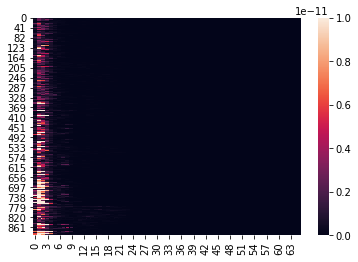

In [142]:
ps = np.matrix(ps).transpose()
ax = sns.heatmap(ps,vmin=0, vmax=(10**(-11)))

<h4>a.2) Calcular la potencia media (entre epochs) para cada frecuencia y graficar la potencia en funcion de la frecuencia para cada canal, como en el ejemplo:</h4>

In [144]:
ps

matrix([[  2.01581403e-12,   5.30054341e-12,   5.71669149e-13, ...,
           3.74676529e-24,   3.19130421e-24,   1.50361129e-24],
        [  1.77629826e-13,   9.51258372e-13,   1.06760070e-12, ...,
           6.91248523e-24,   6.76318743e-24,   3.35692952e-24],
        [  6.10705032e-13,   3.35282327e-12,   5.95058207e-13, ...,
           2.15987403e-24,   1.19398456e-24,   4.37339519e-25],
        ..., 
        [  5.92064038e-12,   8.65943747e-12,   8.46285459e-12, ...,
           1.33241570e-23,   9.34952747e-24,   4.01631132e-24],
        [  1.38574158e-13,   7.98959004e-13,   8.70806716e-13, ...,
           2.55981134e-24,   2.06554508e-24,   9.50963610e-25],
        [  6.49702260e-12,   1.80981884e-11,   7.87152829e-12, ...,
           1.50642807e-23,   9.83804373e-24,   4.05382502e-24]])